# **2. Importing Required Libraries**

In [42]:
# Import Pandas, Seaborn, Matplotlib and NumPY
import pandas as pd;
import seaborn as sns;
import matplotlib.pyplot as plt;
import numpy as np;

# Import Label Encoder, OneHotEncoder, MinMaxScaler
# train_test_split, Grid Search and Cross Validation
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler;
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score;

# Import Linear Regression, Random Forest Regressor
# Gradient Boosting Regressor and SVR models
from sklearn.linear_model import LinearRegression;
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor;
from sklearn.svm import SVR;

# Import R2 Score, MAE and MSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error;

# **3. Perform An Exploratory Data Analysis**



In [43]:
# Read the "insurance.csv" file
insurance = pd.read_csv("insurance.csv");

# Copy the "insurance variable"
data = insurance.copy();

# Use the head() function to display the first 5 rows of the data
print(data.head());

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [44]:
# Use the describe() function to get general statistics of the data
print(data.describe());

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


Examination of the distribution of BMI (Body Mass Index).

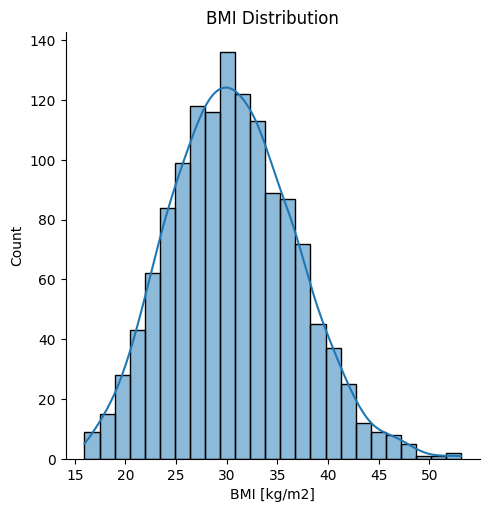

In [45]:
# BMI distribution
sns.displot(data=data, x="bmi", kde=True);

plt.xlabel("BMI [kg/m2]");
plt.title("BMI Distribution");
plt.show();

We can observe a normal distribution of BMI.

And if we classify BMI with body type, we get below results:

In [46]:
bmi_classification = [
    {"low": 0, "high": 16.5, "name": "Severely Underweight"},
    {"low": 16.5, "high": 18.5, "name": "Underweight"},
    {"low": 18.5, "high": 24.9, "name": "Normal Weight"},
    {"low": 24.9, "high": 29.9, "name": "Overweight"},
    {"low": 29.9, "high": 34.9, "name": "Obesity I"},
    {"low": 34.9, "high": 39.9, "name": "Obesity II"},
    {"low": 39.9, "high": 55, "name": "Obesity III"}];

bmi_DF = pd.DataFrame(bmi_classification);
bmi_series = pd.Series(data["bmi"]);
bmi_bins = list(bmi_DF["high"]);
bmi_bins.insert(0, 0);
bmi_labels = list(bmi_DF["name"]);

bmi_cut = pd.cut(x=bmi_series, bins=bmi_bins, labels=bmi_labels);

print(bmi_cut.value_counts(sort=False));

Severely Underweight      1
Underweight              20
Normal Weight           221
Overweight              380
Obesity I               397
Obesity II              226
Obesity III              93
Name: bmi, dtype: int64


Source: [bağlantı metni](https://www.ncbi.nlm.nih.gov/books/NBK541070/)

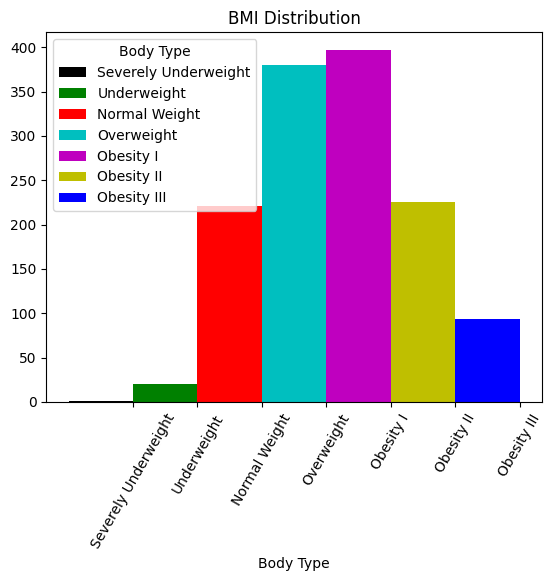

In [47]:
plt.bar(x=bmi_labels, height=bmi_cut.value_counts(sort=False), label=bmi_labels,
        width=-1, align="edge", color=["k", "g", "r", "c", "m", "y", "b"]);

plt.legend(title="Body Type")
plt.xlabel("Body Type");
plt.xticks(rotation=60);
plt.title("BMI Distribution");
plt.show();

It's understood that people are more tend to be overweight rather than being underweight.

Examination of the relationship between “smoker” and “charges”.

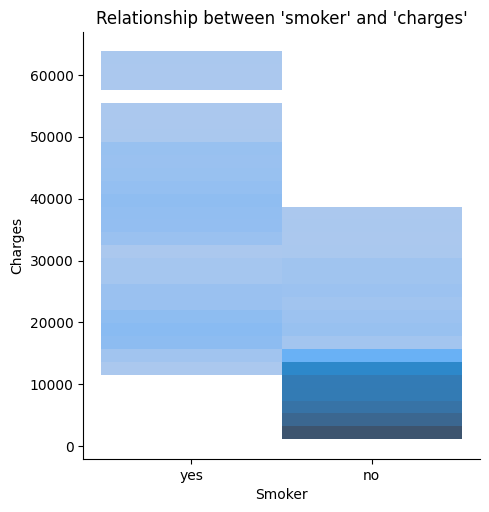

In [48]:
# Relationship between "smoker" and "charges"
sns.displot(data=data, x="smoker", y="charges");

plt.xlabel("Smoker");
plt.ylabel("Charges");
plt.title("Relationship between 'smoker' and 'charges'");
plt.show();

We can observe that smokers charged more.

Examination of the relationship between “smoker” and “region”.

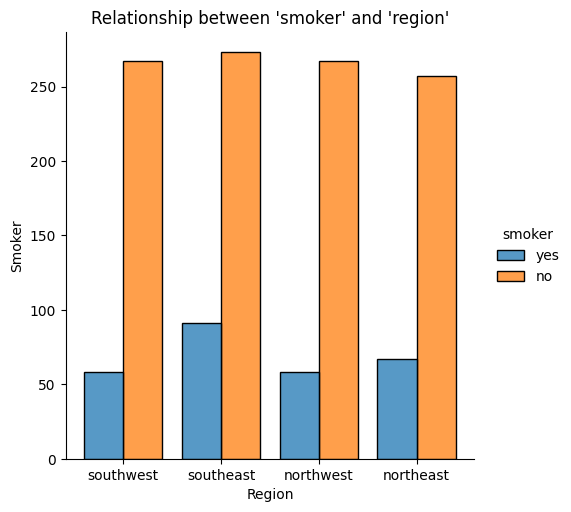

In [49]:
# Relationship between "smoker" and "region"
smoker = data["smoker"].astype("category");

sns.displot(data=data, x="region", hue="smoker", multiple="dodge", shrink=0.8);

plt.xlabel("Region");
plt.ylabel("Smoker");
plt.title("Relationship between 'smoker' and 'region'");
plt.show();

Most of the patients do not smoke. Most smokers are from southeast.

Examination of the relationship between “bmi” and “sex”.

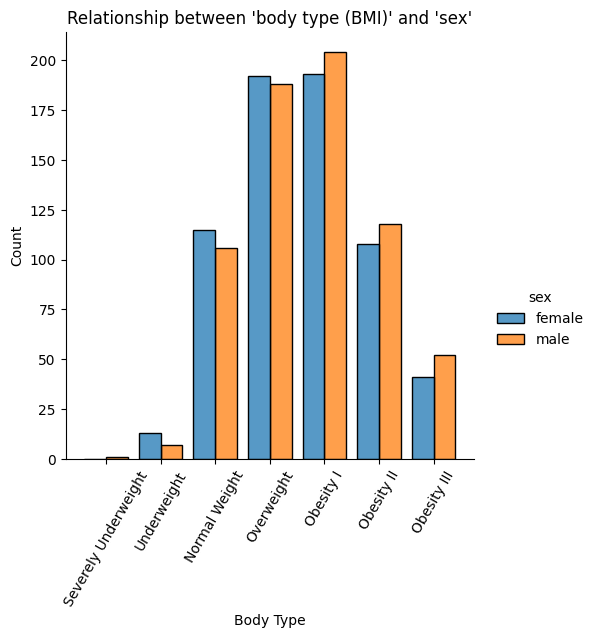

In [50]:
# Relationship between "bmi" and "sex"
sex = data["sex"].astype("category");

sns.displot(data=bmi_cut.to_frame().join(other=sex.to_frame()),
            x="bmi", hue="sex", multiple="dodge", shrink=0.8);

plt.xlabel("Body Type");
plt.xticks(rotation=60);
plt.ylabel("Count");
plt.title("Relationship between 'body type (BMI)' and 'sex'");
plt.show();

Males are more tend to be overweight.

Finding the “region” with the most “children”.

---



In [51]:
# Finding the "region" with the most "children"
region_vs_children = data["region"].to_frame().join(other=data["children"].to_frame());
reg_vs_child = region_vs_children.groupby(["region"]).sum();

print(reg_vs_child);
print(f"\nRegion with the most children is {reg_vs_child['children'].idxmax()} with {max(reg_vs_child['children'])} children.");

           children
region             
northeast       339
northwest       373
southeast       382
southwest       371

Region with the most children is southeast with 382 children.


Examining the relationship between “age” and “bmi”.

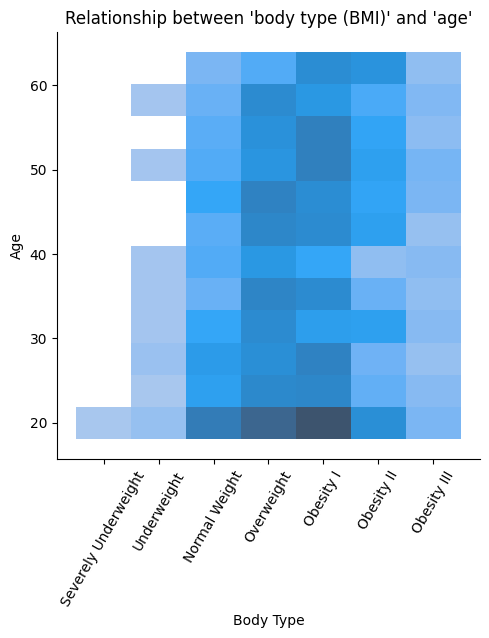

In [52]:
# Examining the relationship between "age" and "bmi"
sns.displot(data=bmi_cut.to_frame().join(other=data["age"]), x="bmi", y="age");

plt.xlabel("Body Type");
plt.xticks(rotation=60);
plt.ylabel("Age");
plt.title("Relationship between 'body type (BMI)' and 'age'");
plt.show();

Younger patients are more likely to be overweight.

Examining the relationship between “bmi” and “children”.

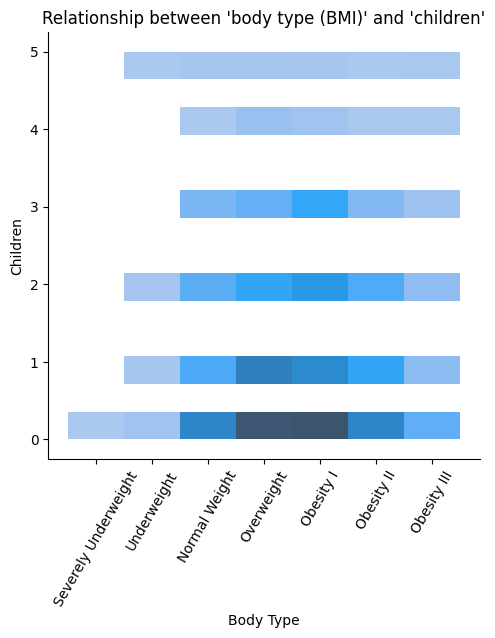

In [53]:
# Examining the relationship between "bmi" and "children"
sns.displot(data=bmi_cut.to_frame().join(other=data["children"]), x="bmi", y="children");

plt.xlabel("Body Type");
plt.xticks(rotation=60);
plt.ylabel("Children");
plt.title("Relationship between 'body type (BMI)' and 'children'");
plt.show();

As the children count grows, patients are more likely to be normal or underweight.

Examining if there is an outlier in “bmi” variable.

      age     sex    bmi  children smoker     region      charges
116    58    male  49.06         0     no  southeast  11381.32540
286    46  female  48.07         2     no  northeast   9432.92530
401    47    male  47.52         1     no  southeast   8083.91980
543    54  female  47.41         0    yes  southeast  63770.42801
847    23    male  50.38         1     no  southeast   2438.05520
860    37  female  47.60         2    yes  southwest  46113.51100
1047   22    male  52.58         1    yes  southeast  44501.39820
1088   52    male  47.74         1     no  southeast   9748.91060
1317   18    male  53.13         0     no  southeast   1163.46270
Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges]
Index: []


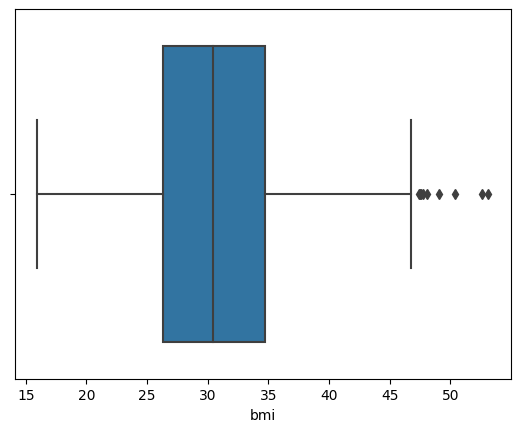

In [54]:
# Examining if there is an outlier in "bmi" variable
sns.boxplot(data=data, x="bmi");

# IQR
# Calculate the upper and lower limits
Q1 = data["bmi"].quantile(0.25);
Q3 = data["bmi"].quantile(0.75);
IQR = Q3 - Q1;
lower = Q1 - 1.5*IQR;
upper = Q3 + 1.5*IQR;

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data["bmi"]>=upper)[0];
lower_array = np.where(data["bmi"]<=lower)[0];

# Printing outliers with respect to BMI
print(data.iloc[upper_array]);
print(data.iloc[lower_array]);

There are 9 outliers in BMI variable.

Examining the relationship between “bmi” and “charges”.

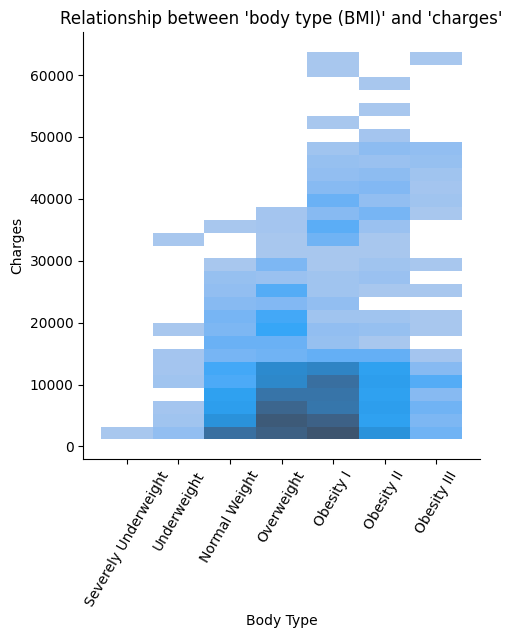

In [55]:
# Examining the relationship between "bmi" and "charges"
sns.displot(data=bmi_cut.to_frame().join(other=data["charges"]), x="bmi", y="charges");

plt.xlabel("Body Type");
plt.xticks(rotation=60);
plt.ylabel("Charges");
plt.title("Relationship between 'body type (BMI)' and 'charges'");
plt.show();

As the BMI grows, patients are more likely the be charged more.

Examining the relationship between “region”, “smoker” and “bmi” using bar plot.

region     bmi                   smoker
northeast  Normal Weight         no        53
                                 yes       19
           Obesity I             no        71
                                 yes       18
           Obesity II            no        30
                                 yes        9
           Obesity III           no        13
                                 yes        3
           Overweight            no        83
                                 yes       15
           Severely Underweight  no         1
           Underweight           no         6
                                 yes        3
northwest  Normal Weight         no        51
                                 yes       11
           Obesity I             no        91
                                 yes       15
           Obesity II            no        29
                                 yes        7
           Obesity III           no         7
                                 yes    

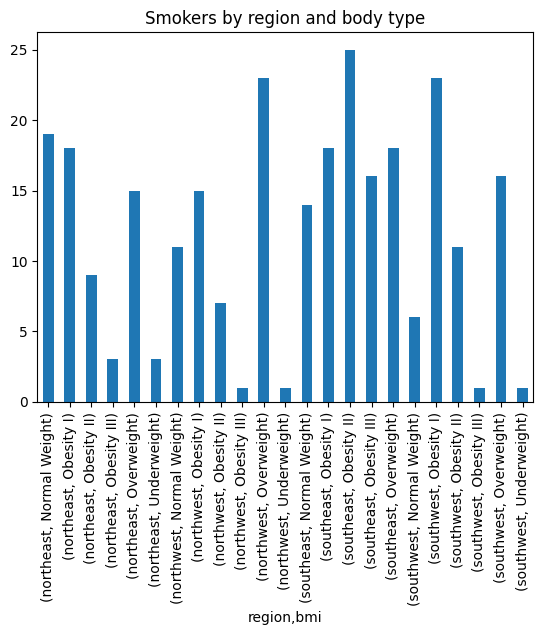

In [56]:
# Examining the relationship between "region", "smoker" and "bmi" using bar plot
df = pd.DataFrame({"bmi":bmi_cut.to_numpy(), "smoker":data["smoker"].to_numpy(),
                   "region":data["region"].to_numpy()});

print(df.groupby("region").value_counts(sort=False));

df_index = df[df["smoker"]=="no"].index;
df.drop(df_index, inplace=True);
df = df.drop(columns=["smoker"]).groupby("region").value_counts(sort=False);

plt.title("Smokers by region and body type");
df.plot.bar();

Most smokers are from Southwest with Obesity II body type.

# **4. Data Preprocessing**


First, we seperate dependent variable (which is charge) from the independent variables.

In [57]:
### Features and labels
# Create the X variable for features
X = data.loc[:, ["age", "sex", "bmi", "children", "smoker", "region"]];

# Create the y variable for output labels
y = data.loc[:, "charges"];

Then, we convert the string data into numerical data since machine learning models only understands numerical data.

In [58]:
# Converting string data into numerical data
X["sex"] = X["sex"].map({"female":0, "male":1});
X["smoker"] = X["smoker"].map({"yes":1, "no":0});
X["region"] = X["region"].map({"southwest":1, "southeast":2, "northwest":3, "northeast":4});

Now, we normalize data using minimum - maximum scaling technique to normalize x and y axis.

In [59]:
### Converting the values
# Create MinMaxScaler object
scaler = MinMaxScaler();

# Normalize data
data_scaled = scaler.fit_transform(X.join(other=y));

X = data_scaled[:, :-1];
y = data_scaled[:, -1];

Then, we encode independent variables with OneHotEncoder while we encode the dependent variable using LabelEncoder. Encoding reduces calculation error gaps.

In [60]:
# Create LabelEncoder and OneHotEncoder object
encoder = LabelEncoder();
ohe = OneHotEncoder();

# Encode the features to integers inside a for loop
X = ohe.fit_transform(X);
y = encoder.fit_transform(y);

# Print X
print(X);

# Print y
print(y);

  (0, 1)	1.0
  (0, 47)	1.0
  (0, 246)	1.0
  (0, 597)	1.0
  (0, 604)	1.0
  (0, 605)	1.0
  (1, 0)	1.0
  (1, 48)	1.0
  (1, 399)	1.0
  (1, 598)	1.0
  (1, 603)	1.0
  (1, 606)	1.0
  (2, 10)	1.0
  (2, 48)	1.0
  (2, 380)	1.0
  (2, 600)	1.0
  (2, 603)	1.0
  (2, 606)	1.0
  (3, 15)	1.0
  (3, 48)	1.0
  (3, 122)	1.0
  (3, 597)	1.0
  (3, 603)	1.0
  (3, 607)	1.0
  (4, 14)	1.0
  :	:
  (1333, 607)	1.0
  (1334, 0)	1.0
  (1334, 47)	1.0
  (1334, 351)	1.0
  (1334, 597)	1.0
  (1334, 603)	1.0
  (1334, 608)	1.0
  (1335, 0)	1.0
  (1335, 47)	1.0
  (1335, 471)	1.0
  (1335, 597)	1.0
  (1335, 603)	1.0
  (1335, 606)	1.0
  (1336, 3)	1.0
  (1336, 47)	1.0
  (1336, 195)	1.0
  (1336, 597)	1.0
  (1336, 603)	1.0
  (1336, 605)	1.0
  (1337, 43)	1.0
  (1337, 47)	1.0
  (1337, 278)	1.0
  (1337, 597)	1.0
  (1337, 604)	1.0
  (1337, 607)	1.0
[1005   57  306 ...   32   91 1171]


Finally, we split train and test data from our preprocessed data.

In [61]:
### Split the data
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7);

We have used “random_state” parameter to get same random data so it will be easier to benchmark for each run.

# **5. Model Selection**

Since this is a regression problem, we will compare the most widely used regression models.

First, we initiliaze them.

In [62]:
### Creating  models
# Create an object using the LinearRegression() class
linear_regression_model = LinearRegression();

# Create an object using the SVR() class
svm_model = SVR();

# Create an object using the RandomForestRegressor() class
random_forest_regressor_model = RandomForestRegressor();

# Create an object using the GradientBoostingRegressor() class
gradient_boosting_regressor_model = GradientBoostingRegressor();

And then, we train them with our preprocessed data from previous chapter.

In [63]:
### Training models
# Train the Linear Regression model
linear_regression_model.fit(X_train, y_train);

# Train the SVM model
svm_model.fit(X_train, y_train);

# Train the Random Forest Regressor model
random_forest_regressor_model.fit(X_train, y_train);

# Train the Gradient Boosting Regressor model
gradient_boosting_regressor_model.fit(X_train, y_train);

Finally, we compare train and test data using our trained models.

In [64]:
### Predicting models
# Make prediction using the test dataset on Linear Regression model
linear_regression_pred = linear_regression_model.predict(X_test);

# Make prediction using the test dataset on SVM model
svm_pred = svm_model.predict(X_test);

# Make prediction using the test dataset on Random Forest Regressor model
random_forest_regressor_pred = random_forest_regressor_model.predict(X_test);

# Make prediction using the test dataset on Gradient Boosting Regressor model
gradient_boosting_regressor_pred = gradient_boosting_regressor_model.predict(X_test);

To select the best performed model, we use the “Cross Validation” technique.

In [65]:
### Comparing models
# Linear Regression model performance
linear_regression_scores = cross_val_score(linear_regression_model, X, y, cv=5);

# SVM model performance
svm_scores = cross_val_score(svm_model, X, y, cv=5);

# Random Forest Regressor model performance
random_forest_regressor_scores = cross_val_score(random_forest_regressor_model, X, y, cv=5);

# Gradient Boosting Regressor model performance
gradient_boosting_regressor_scores = cross_val_score(gradient_boosting_regressor_model, X, y, cv=5);

If we print the cross validation scores for each model...

In [66]:
### Printing model performances
# Print the scores of the Linear Regression model
print("***** Linear Regression *****");
print(linear_regression_scores);

# Print the scores of the SVM model
print("***** SVM *****");
print(svm_scores);

# Print the scores of the Random Forest Regressor model
print("***** Random Forest Regressor *****");
print(random_forest_regressor_scores);

# Print the scores of the Gradient Boosting Regressor model
print("***** Gradient Boosting Regressor *****");
print(gradient_boosting_regressor_scores);

***** Linear Regression *****
[0.63663075 0.53150565 0.67707939 0.62573787 0.58772487]
***** SVM *****
[0.05315752 0.04467306 0.04911635 0.05066056 0.05530964]
***** Random Forest Regressor *****
[0.85173151 0.65810351 0.87113379 0.79385734 0.723945  ]
***** Gradient Boosting Regressor *****
[0.7754702  0.63321351 0.75679085 0.71836098 0.70357961]


...we can conclude that the “Random Forest Regression” model performed best.

# **6. Hyper-parameter Optimization**

Now it's time to find optimum parameters for our best regression model.

For this, we use “Grid Search” technique to find best performing parameters amongst the 2.3.3.3=54 possibilities.

In [67]:
### Using Grid Search to find optimized parameters for the Random Forest Regressor
parameters = {
 "max_depth": [50, 100],
 "min_samples_leaf": [1, 2, 3],
 "min_samples_split": [1, 2, 3],
 "n_estimators": [500, 1000, 1500]};

grid_GBR = GridSearchCV(estimator=RandomForestRegressor(), param_grid=parameters, cv=2, n_jobs=-1);
grid_GBR.fit(X_train, y_train);

print("Results from Grid Search");
print("\nThe best estimator across ALL searched params:\n", grid_GBR.best_estimator_);
print("\nThe best score across ALL searched params:\n", grid_GBR.best_score_);
print("\nThe best parameters across ALL searched params:\n", grid_GBR.best_params_);

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
36 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
36 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Results from Grid Search

The best estimator across ALL searched params:
 RandomForestRegressor(max_depth=50, min_samples_split=3, n_estimators=1000)

The best score across ALL searched params:
 0.7342038341390611

The best parameters across ALL searched params:
 {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 1000}


# **7. Model Evaluation**

Now we evaluate our best model with it's optimum parameters.

In [68]:
### Model evaluation for the Random Forest Regressor
# Fitting data with hyper-parameters found previously
random_forest_regressor_model = RandomForestRegressor(
    bootstrap=True,
    max_features=1.0,
    max_depth=grid_GBR.best_params_["max_depth"],
    min_samples_leaf=grid_GBR.best_params_["min_samples_leaf"],
    min_samples_split=grid_GBR.best_params_["min_samples_split"],
    n_estimators=grid_GBR.best_params_["n_estimators"]
);

random_forest_regressor_model.fit(X_train, y_train);
random_forest_regressor_pred = random_forest_regressor_model.predict(X_test);

If we print “R2 Score”, “Mean Absolute Error” and “Mean Squared Error” for our model results...

In [69]:
# Create a R2 Score Report for Random Forest Regressor model
print("***** Random Forest Regressor (R2 Score) *****");
print(r2_score(y_test, random_forest_regressor_pred));

# Create a Mean Absolute Error Report for Random Forest Regressor model
print("***** Random Forest Regressor (Mean Absolute Error) *****");
print(mean_absolute_error(y_test, random_forest_regressor_pred));

# Create a Mean Squared Error Report for Random Forest Regressor model
print("***** Random Forest Regressor (Mean Squared Error) *****");
print(mean_squared_error(y_test, random_forest_regressor_pred));

***** Random Forest Regressor (R2 Score) *****
0.830746192215321
***** Random Forest Regressor (Mean Absolute Error) *****
83.84251093041281
***** Random Forest Regressor (Mean Squared Error) *****
25792.308908614115


...we can observe that our model has decent accuracy (R2 Score) and decent precision (MAE and MSE).